In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

In [2]:

def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_21, w_22, b_1, b_2, v_1, v_2, c = param_vec
    W = np.array([[w_11,w_12],[w_21,w_22]])
    b = np.array([b_1, b_2])
    v = np.array([v_1,v_2])
    c = np.array([c])
    return((W, b, v, c))
    


In [3]:
W = np.random.randn(4).reshape((2,2))
b = np.random.randn(2)
v = np.random.randn(2)
c = np.random.randn(1)

In [4]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw21, dL_dw22, dL_db1, dL_db2, dL_dv1, dL_dv2, dL_dc])

In [5]:
def grad_f_2(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat) )
    
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[1,0], dL_dw[1,1], dL_db[0], dL_db[1], dL_dv[0], dL_dv[1], dL_dc]) / len(y) 

In [6]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=9).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

## Gaussians dataset

In [7]:
# easy dataset
x = np.concatenate(
    (np.random.multivariate_normal(mean=[-3,-3],cov=[[1,0],[0,2]],size = 500),
    np.random.multivariate_normal(mean=[3,3],cov=[[1,0],[0,2]],size = 500)))
y = np.zeros(1000)
y[:500] = 1

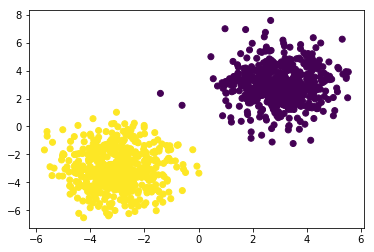

In [8]:
plt.scatter(x[:,0], x[:,1], c=y)

In [9]:
traj, losses = grad_descent(x, y, iterations=550,learning_rate=.01)

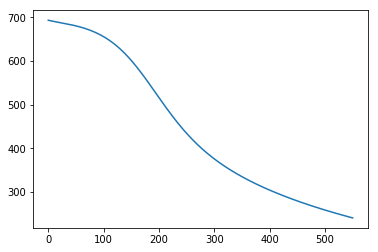

In [10]:
plt.plot(losses)

In [11]:
yhat(x[495:505],*pack_params(traj[-1]))

array([ 0.64837689,  0.64837689,  0.64837689,  0.64837689,  0.64837689,
        0.0089461711,  0.026169749,  0.042873604,  0.027094972,
        0.027091206], dtype=float128)

In [12]:
y[495:505]

array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [13]:
sum(y == np.where(yhat(x,*pack_params(traj[-1])) > .5, 1, 0))

1000

In [14]:
loss(1.0, .54)

0.61618613942381695

## Scattered XOR dataset


In [15]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

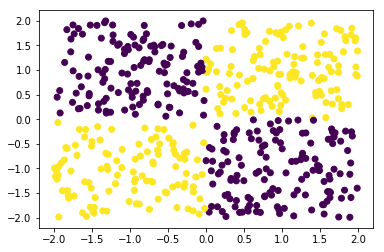

In [16]:
plt.scatter(x[:,0],x[:,1],c=y)

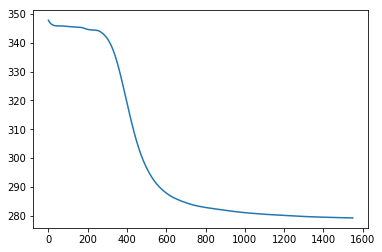

In [22]:
traj, losses = grad_descent(x, y, iterations=1550,learning_rate=1e-1)
plt.plot(losses)

In [23]:
sum(y == np.where(yhat(x,*pack_params(traj[-1])) > .5, 1, 0))

353